# YOLO-v2 Object Detection model on SKIL

In [2]:
from skil import Skil, WorkSpace, Experiment, Model, Deployment

## SKIL deployment

In [3]:
skil_server = Skil(
    host          = 'localhost',
    port          = 9008,
    user_id       = 'admin',
    password      = 'Skymind'
)

work_space = WorkSpace(
    skil          = skil_server, 
    name          = 'yolo-workspace'
)

experiment = Experiment(
    work_space    = work_space, 
    name          = 'yolo-experiment', 
    experiment_id = 'yolo-experiment-01'
)

model = Model(
    model         = 'yolo2.pb', 
    name          = 'yolo-model',
    model_id      = 'yolo-model-01',
    experiment    = experiment
)

deployment = Deployment(
    skil          = skil_server,
    name          = 'yolo-deployment'
)

'>>> Authenticating SKIL...'
'>>> Done!'
'>>> Uploading model, this might take a while...'
[   {'file_content': None,
 'file_name': 'yolo2.pb',
 'key': 'file',
 'path': '/opt/skil/plugins/files/MODEL/yolo2.pb',
 'status': 'uploaded',
 'type': None}]


In [4]:
service = model.deploy(deployment=deployment, input_names=['input'], output_names=['output'])

{'created': 1557818695365,
 'deployment_id': 0,
 'extra_args': None,
 'file_location': None,
 'id': 0,
 'jvm_args': None,
 'labels_file_location': None,
 'launch_policy': {'@class': 'io.skymind.deployment.launchpolicy.DefaultLaunchPolicy',
                   'maxFailuresMs': 300000,
                   'maxFailuresQty': 3},
 'model_state': None,
 'model_type': 'model',
 'name': 'yolo-model',
 'scale': 1.0,
 'state': 'stopped',
 'sub_type': None,
 'updated': None}
'>>> Starting to serve model...'
'>>> Waiting for deployment...'
'>>> Waiting for deployment...'
'>>> Waiting for deployment...'
'>>> Waiting for deployment...'
'>>> Waiting for deployment...'
'>>> Waiting for deployment...'
'>>> Model server started successfully!'


## Run YOLO-v2 Detection

In [ ]:
import skil, requests, cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load image
image = cv2.imread("images/img-4.jpg")
plt.figure(figsize=(9,9))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
image.shape

# Set configurations & temp image
threshold=0.5
needs_preprocessing=False
temp_path='images/temp.jpg'
cv2.imwrite(temp_path, image)

In [ ]:
response = requests.post(
    url=url,
    headers=skil_server.auth_headers,
    files={
        'file': (temp_path, data, 'image/jpeg')
    },
    data={
        'id': model.id,
        'needs_preprocessing': 'true' if needs_preprocessing else 'false',
        'threshold': str(threshold)
    }
)

In [5]:
url = 'http://{}/endpoints/{}/model/{}/v{}/detectobjects'.format(
    skil_sezzzzzrver.config.host,
    model.deployment.name,
    model.name,
    model.version
)

with open(temp_path, 'rb') as data:
    response = requests.post(
        url=url,
        headers=skil_server.auth_headers,
        files={
            'file': (temp_path, data, 'image/jpeg')
        },
        data={
            'id': model.id,
            'needs_preprocessing': 'true' if needs_preprocessing else 'false',
            'threshold': str(threshold)
        }
    )
    
detections = response.json()
# print(json.dumps(detection, indent=4))

## Returned JSON object of detections
```json
{
    "id": "6360f34c-6a56-11e9-bccf-48e244f69ad1",
    "objects": [
        {
            "centerX": 47.0,
            "centerY": 293.0,   
            "height": 186.0,
            "width": 83.0
            
            "confidences": [
                0.9903313, 
                0.0035145332, 0.0024128028, 0.00035593743, 
                0.00035402825, 0.00032288558, 0.00029532236, 
                0.00020606995, 0.00019346853, 0.00016515494
            ],
            "predictedClasses": [
                "person", 
                "handbag", "backpack", "teddy bear", "chair",
                "bird", "motorbike", "elephant", "dog", "bicycle"
            ],
            "predictedClassNumbers": [0, 26, 24, 77, 56, 14, 3, 20, 16, 1],
            
        },
        {
          ...
        }
    ]
}

```

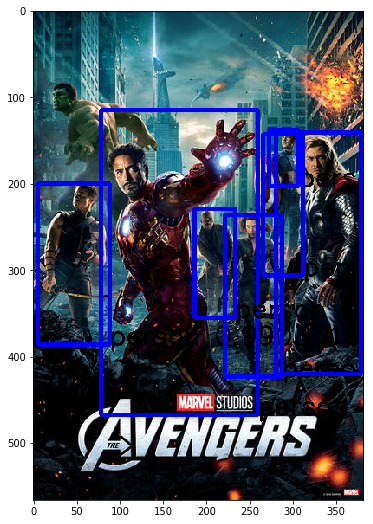

In [6]:
image = skil.utils.yolo.annotate_image(image, detections)

cv2.imwrite('images/annotated.jpg', image)

plt.figure(figsize=(9,9))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

## List detected objects

In [7]:
for k, detection in enumerate(detections['objects']):
    predicted = detection['predictedClasses'][0]
    confidence = detection['confidences'][0]
    
    print('{}: [{}, {:.5}]'.format(k+1, predicted, confidence))
    

1: [person, 0.99033]
2: [person, 0.98429]
3: [person, 0.99946]
4: [person, 0.99778]
5: [person, 0.99898]
6: [person, 0.99993]
7: [person, 0.99949]
